In [68]:
# Load Libraries
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats.stats import pearsonr

import pandas as pd
from pandas.tools.plotting import scatter_matrix

import IPython
from IPython import display

from sklearn import svm, tree, linear_model, ensemble

from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.image as mpimg
import seaborn as sns

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize']=12,8
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # 3 decimal spots for float

import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test.csv']


In [69]:
df_train = pd.read_csv('../input/train.csv')
df_val = pd.read_csv('../input/test.csv')
print('Train: ', df_train.shape)
print('Val: ', df_val.shape)

Train:  (42000, 785)
Val:  (28000, 784)


In [70]:
df_train.sample(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
18334,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9545,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38025,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7453,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37461,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40251,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16247,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14428,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
df_train.dtypes


label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
            ...  
pixel754    int64
pixel755    int64
pixel756    int64
pixel757    int64
pixel758    int64
pixel759    int64
pixel760    int64
pixel761    int64
pixel762    int64
pixel763    int64
pixel764    int64
pixel765    int64
pixel766    int64
pixel767    int64
pixel768    int64
pixel769    int64
pixel770    int64
pixel771    int64
pixel772    int64
pixel773    int64
pixel774    int64
pixel775    int64
pixel776    int64
pixel777    int64
pixel778  

In [72]:
df_labels = df_train[['label']]
df_labels.head()

,label
0,1
1,0
2,1
3,4
4,0


In [73]:
df_images = df_train.drop('label', axis=1)

In [74]:
df_images.shape

(42000, 784)

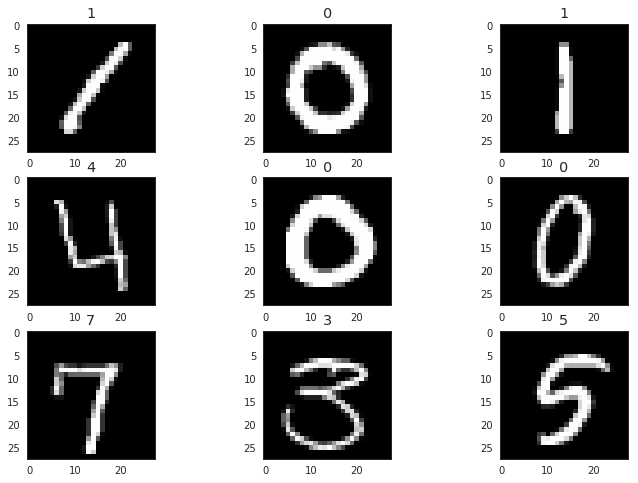

In [75]:
for i in range(0,9):
    plt.subplot(330+(i+1))
    im= df_images.iloc[i].as_matrix()
    im = im.reshape((28,28))
    plt.imshow (im, cmap='gray')
    plt.title(df_labels.iloc[i,0])

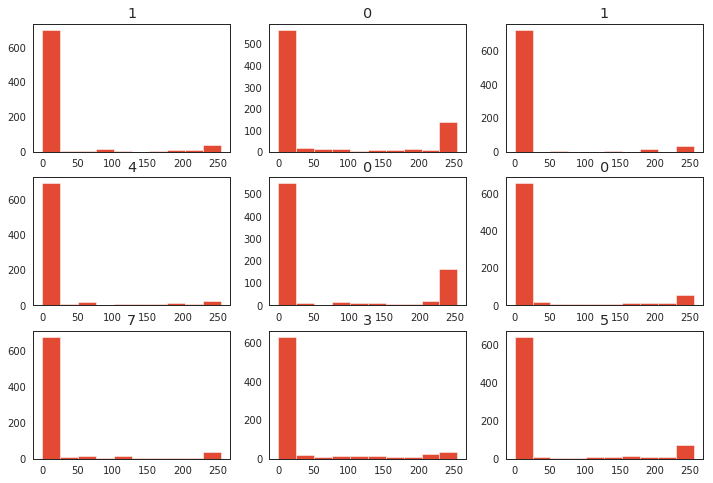

In [76]:
for i in range(0,9):
    plt.subplot(330+(i+1))
    plt.hist (df_images.iloc[i])
    plt.title(df_labels.iloc[i,0])

In [77]:
# Normalize data
df_images_norm = StandardScaler().fit_transform(df_images)

In [78]:
# Encode Labels to categories
df_labels_cat = np_utils.to_categorical(df_labels)
num_classes = df_labels_cat.shape[1]
print(num_classes)

10


In [79]:
# subset and split data for modeling
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_images_norm, df_labels_cat, train_size=0.8, random_state=0)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600, 10)
(8400, 10)


In [81]:
# Neural Network Model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
print('input shape: ', model.input_shape)
print('output shape: ', model.output_shape)

input shape:  (None, 784)
output shape:  (None, 10)


In [82]:
from keras.optimizers import RMSprop
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
             metrics=['accuracy'])

In [83]:
history = model.fit(X_train, y_train, nb_epoch=10, batch_size=16, validation_split=0.1, verbose=2)


Train on 30240 samples, validate on 3360 samples
Epoch 1/10
 - 5s - loss: 0.3651 - acc: 0.8992 - val_loss: 0.2553 - val_acc: 0.9432
Epoch 2/10
 - 5s - loss: 0.2417 - acc: 0.9433 - val_loss: 0.2494 - val_acc: 0.9506
Epoch 3/10
 - 5s - loss: 0.2302 - acc: 0.9511 - val_loss: 0.2585 - val_acc: 0.9530
Epoch 4/10
 - 5s - loss: 0.2411 - acc: 0.9553 - val_loss: 0.2666 - val_acc: 0.9571
Epoch 5/10
 - 5s - loss: 0.2567 - acc: 0.9568 - val_loss: 0.2830 - val_acc: 0.9574
Epoch 6/10
 - 5s - loss: 0.2506 - acc: 0.9599 - val_loss: 0.3221 - val_acc: 0.9557
Epoch 7/10
 - 5s - loss: 0.2712 - acc: 0.9597 - val_loss: 0.4008 - val_acc: 0.9506
Epoch 8/10
 - 5s - loss: 0.2926 - acc: 0.9595 - val_loss: 0.3932 - val_acc: 0.9539
Epoch 9/10
 - 5s - loss: 0.3010 - acc: 0.9601 - val_loss: 0.3473 - val_acc: 0.9592
Epoch 10/10
 - 5s - loss: 0.3228 - acc: 0.9597 - val_loss: 0.3996 - val_acc: 0.9542


In [84]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

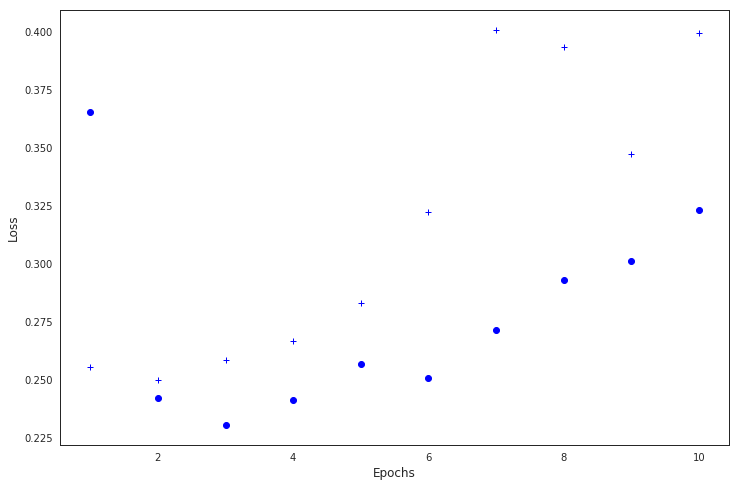

In [85]:
# plot results
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

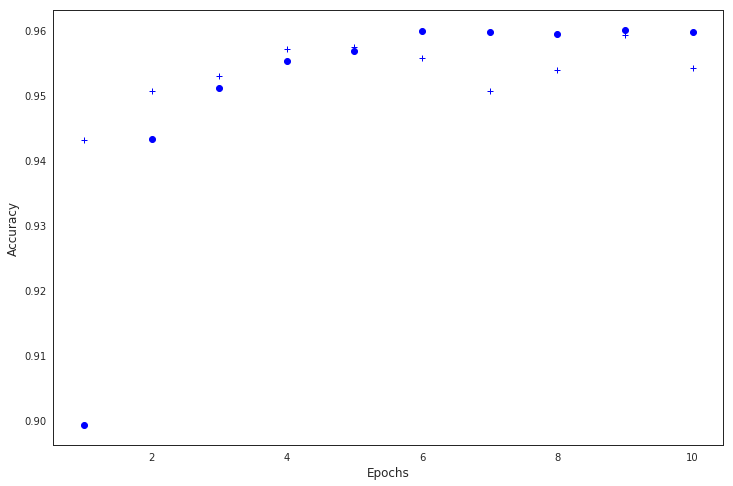

In [86]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [87]:
predictions = model.predict_classes(X_test, verbose=0)
predictions

array([5, 6, 9, ..., 2, 7, 2])

In [88]:
correct=0
for i,row in enumerate(predictions):
    if y_test[i][row]==1: correct +=1
accuracy = correct / len(predictions)
print ('Accuracy: {:.2f} %'.format(accuracy*100))

Accuracy: 95.80 %
